In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('data/googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### Check Duplicated Data and remove them

In [3]:
df.duplicated().sum()

483

In [4]:
df.drop_duplicates(inplace = True)

### Check the data types of columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Univariate analysis

In [6]:
df['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

### Remove the column that has error

In [7]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
df.drop(10472,axis = 0 , inplace =True)

In [9]:
df.reset_index(inplace =True , drop = True)

### Rating Column

In [10]:
df['Rating'].describe()

count    8892.000000
mean        4.187877
std         0.522377
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Rating'>

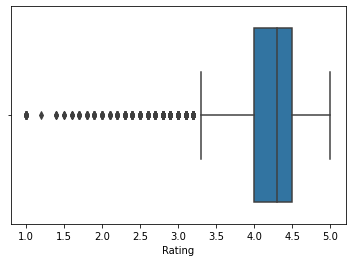

In [11]:
sns.boxplot(data = df ,x ='Rating')

### The outlier here have business meaning so we can't remove them

### Review Column

In [12]:
df['Reviews'].unique().tolist()

['159',
 '967',
 '87510',
 '215644',
 '167',
 '178',
 '36815',
 '13791',
 '121',
 '13880',
 '8788',
 '44829',
 '4326',
 '1518',
 '55',
 '3632',
 '27',
 '194216',
 '224399',
 '450',
 '654',
 '7699',
 '61',
 '118',
 '192',
 '20260',
 '203',
 '136',
 '223',
 '1120',
 '227',
 '5035',
 '1015',
 '353',
 '564',
 '8145',
 '36639',
 '158',
 '591',
 '117',
 '176',
 '295221',
 '2206',
 '26',
 '174531',
 '1070',
 '85',
 '845',
 '367',
 '1598',
 '284',
 '17057',
 '129',
 '542',
 '10479',
 '805',
 '1403',
 '3971',
 '534',
 '7774',
 '38846',
 '2431',
 '6090',
 '295',
 '190',
 '40211',
 '356',
 '52530',
 '116986',
 '1379',
 '271920',
 '736',
 '7021',
 '197',
 '737',
 '3574',
 '994',
 '197136',
 '142',
 '15168',
 '2155',
 '138',
 '5414',
 '21777',
 '348',
 '250',
 '13372',
 '7880',
 '3617',
 '4806',
 '65786',
 '31433',
 '5097',
 '1754',
 '2680',
 '1288',
 '18900',
 '49790',
 '1150',
 '1739',
 '32090',
 '2225',
 '4369',
 '8572',
 '964',
 '42050',
 '104',
 '17934',
 '601',
 '36',
 '187',
 '182',
 '30',
 

In [13]:
df['Reviews'] = pd.to_numeric(df['Reviews'] , errors='coerce')

### Size Column

In [14]:
df['Size'].unique().tolist()

['19M',
 '14M',
 '8.7M',
 '25M',
 '2.8M',
 '5.6M',
 '29M',
 '33M',
 '3.1M',
 '28M',
 '12M',
 '20M',
 '21M',
 '37M',
 '2.7M',
 '5.5M',
 '17M',
 '39M',
 '31M',
 '4.2M',
 '7.0M',
 '23M',
 '6.0M',
 '6.1M',
 '4.6M',
 '9.2M',
 '5.2M',
 '11M',
 '24M',
 'Varies with device',
 '9.4M',
 '15M',
 '10M',
 '1.2M',
 '26M',
 '8.0M',
 '7.9M',
 '56M',
 '57M',
 '35M',
 '54M',
 '201k',
 '3.6M',
 '5.7M',
 '8.6M',
 '2.4M',
 '27M',
 '2.5M',
 '16M',
 '3.4M',
 '8.9M',
 '3.9M',
 '2.9M',
 '38M',
 '32M',
 '5.4M',
 '18M',
 '1.1M',
 '2.2M',
 '4.5M',
 '9.8M',
 '52M',
 '9.0M',
 '6.7M',
 '30M',
 '2.6M',
 '7.1M',
 '3.7M',
 '22M',
 '7.4M',
 '6.4M',
 '3.2M',
 '8.2M',
 '9.9M',
 '4.9M',
 '9.5M',
 '5.0M',
 '5.9M',
 '13M',
 '73M',
 '6.8M',
 '3.5M',
 '4.0M',
 '2.3M',
 '7.2M',
 '2.1M',
 '42M',
 '7.3M',
 '9.1M',
 '55M',
 '23k',
 '6.5M',
 '1.5M',
 '7.5M',
 '51M',
 '41M',
 '48M',
 '8.5M',
 '46M',
 '8.3M',
 '4.3M',
 '4.7M',
 '3.3M',
 '40M',
 '7.8M',
 '8.8M',
 '6.6M',
 '5.1M',
 '61M',
 '66M',
 '79k',
 '8.4M',
 '118k',
 '44M',
 '695

In [15]:
  df[  ~ (  (df['Size'].str.endswith('M')) | (df['Size'].str.endswith('K')) | (df['Size'].str.endswith('k'))  ) ]['Size'].unique()

array(['Varies with device'], dtype=object)

In [16]:
def fix_size(r):
    try:
        if r.endswith('M'):
            return float(r[:-1])
        elif r.endswith('K') or r.endswith('k'):
            return float (r[:-1] / 1024)
        else:
            return np.nan
    except:
        return np.nan
        
    

In [17]:
df['Size'] = df['Size'].apply(fix_size)

In [18]:
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10352    53.0
10353     3.6
10354     9.5
10355     NaN
10356    19.0
Name: Size, Length: 10357, dtype: float64

### Installs Column

In [19]:
df['Installs'].value_counts()

1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: Installs, dtype: int64

### Type Column

In [20]:
df['Type'].value_counts()

Free    9591
Paid     765
Name: Type, dtype: int64

### Price Column

In [21]:
df['Price'].value_counts()

0          9592
$0.99       146
$2.99       125
$1.99        73
$4.99        70
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [22]:
def fix_price(r):
    try:
        if r.startswith("$"):
            return float(r[1:])
        else:
            return float(r)
    except:
        return np.nan

In [23]:
df['Price'] = df['Price'].apply(fix_price)

In [24]:
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10352    0.0
10353    0.0
10354    0.0
10355    0.0
10356    0.0
Name: Price, Length: 10357, dtype: float64

### Content Rating Column

In [25]:
df['Content Rating'].value_counts()

Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [26]:
df[df['Content Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6843,Best CG Photography,FAMILY,NaN,1,2.5,500+,Free,0.0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
7795,DC Universe Online Map,TOOLS,4.1,1186,6.4,"50,000+",Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [27]:
df.at[6843,'Content Rating']='Everyone'
df.at[7795,'Content Rating']='Everyone'

### Genres Columns

In [28]:
df['Genres'].value_counts()

Tools                                842
Entertainment                        588
Education                            527
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: Genres, Length: 119, dtype: int64

In [29]:
df['Genres'].unique().tolist()

['Art & Design',
 'Art & Design;Pretend Play',
 'Art & Design;Creativity',
 'Art & Design;Action & Adventure',
 'Auto & Vehicles',
 'Beauty',
 'Books & Reference',
 'Business',
 'Comics',
 'Comics;Creativity',
 'Communication',
 'Dating',
 'Education;Education',
 'Education',
 'Education;Creativity',
 'Education;Music & Video',
 'Education;Action & Adventure',
 'Education;Pretend Play',
 'Education;Brain Games',
 'Entertainment',
 'Entertainment;Music & Video',
 'Entertainment;Brain Games',
 'Entertainment;Creativity',
 'Events',
 'Finance',
 'Food & Drink',
 'Health & Fitness',
 'House & Home',
 'Libraries & Demo',
 'Lifestyle',
 'Lifestyle;Pretend Play',
 'Adventure;Action & Adventure',
 'Arcade',
 'Casual',
 'Card',
 'Casual;Pretend Play',
 'Action',
 'Strategy',
 'Puzzle',
 'Sports',
 'Music',
 'Word',
 'Racing',
 'Casual;Creativity',
 'Casual;Action & Adventure',
 'Simulation',
 'Adventure',
 'Board',
 'Trivia',
 'Role Playing',
 'Simulation;Education',
 'Action;Action & Adventure

In [30]:
df[['Genres','Category']]

,Genres,Category
0,Art & Design,ART_AND_DESIGN
1,Art & Design;Pretend Play,ART_AND_DESIGN
2,Art & Design,ART_AND_DESIGN
3,Art & Design,ART_AND_DESIGN
4,Art & Design;Creativity,ART_AND_DESIGN
...,...,...
10352,Education,FAMILY
10353,Education,FAMILY
10354,Medical,MEDICAL
10355,Books & Reference,BOOKS_AND_REFERENCE


In [31]:
### Category and Genres are approximately similar , so remove Genres column

In [32]:
df.drop('Genres' , axis = 1 , inplace = True)

### Drop Current ver column as it has no meaning in analysis

In [33]:
df['Current Ver'].value_counts()

Varies with device    1302
1.0                    802
1.1                    260
1.2                    177
2.0                    149
                      ... 
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
7.1.34.28                1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

In [34]:
df.drop('Current Ver' , axis = 1 , inplace = True)

### Android Ver Columns

In [35]:
df['Android Ver'].value_counts()

4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1337
Varies with device    1221
4.4 and up             894
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [36]:
df[df['Android Ver'].astype(str).str.startswith('4')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,"June 20, 2018",4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...
10347,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8,"5,000+",Free,0.0,Everyone,"June 13, 2018",4.0 and up
10350,FR Calculator,FAMILY,4.0,7,2.6,500+,Free,0.0,Everyone,"June 18, 2017",4.1 and up
10351,FR Forms,BUSINESS,NaN,0,9.6,10+,Free,0.0,Everyone,"September 29, 2016",4.0 and up
10352,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0.0,Everyone,"July 25, 2017",4.1 and up


### so we can see the version 4 is the dominant here , so we can create a new column that indicates if it works on version smaller than 4

In [37]:
def fix_ver(r):
    try:
        if r.startswith('4'):
            return 0
        else:
            return 1
    except:
        return 1

In [38]:
df['Works_under_And_Ver_4'] = df['Android Ver'].apply(fix_ver)

In [39]:
df['Works_under_And_Ver_4'].value_counts()

0    6697
1    3660
Name: Works_under_And_Ver_4, dtype: int64

In [40]:
df.drop('Android Ver' , axis = 1 ,inplace = True)

### Check Missing Values

In [41]:
df.isnull().mean() *100

App                       0.000000
Category                  0.000000
Rating                   14.145023
Reviews                   0.000000
Size                     17.775418
Installs                  0.000000
Type                      0.009655
Price                     0.000000
Content Rating            0.000000
Last Updated              0.000000
Works_under_And_Ver_4     0.000000
dtype: float64

### Drop the few missing rows in the Type column

In [42]:
df.dropna(subset='Type' , axis = 0  , inplace=True)

In [43]:
df.isnull().mean() *100

App                       0.000000
Category                  0.000000
Rating                   14.136732
Reviews                   0.000000
Size                     17.767478
Installs                  0.000000
Type                      0.000000
Price                     0.000000
Content Rating            0.000000
Last Updated              0.000000
Works_under_And_Ver_4     0.000000
dtype: float64

In [44]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Works_under_And_Ver_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,"January 7, 2018",0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,"January 15, 2018",0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,"August 1, 2018",0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,"June 8, 2018",0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,"June 20, 2018",0
...,...,...,...,...,...,...,...,...,...,...,...
10352,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0.0,Everyone,"July 25, 2017",0
10353,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0.0,Everyone,"July 6, 2018",0
10354,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0.0,Everyone,"January 20, 2017",1
10355,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0.0,Mature 17+,"January 19, 2015",1


### Deal with missing in Rating Column

In [45]:
from sklearn.impute import SimpleImputer

<AxesSubplot:xlabel='Rating'>

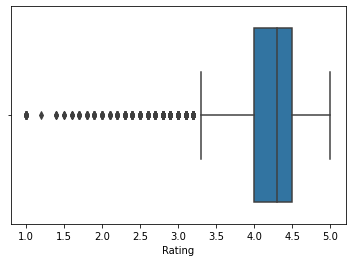

In [46]:
sns.boxplot(data = df , x ='Rating')

In [47]:
imputer = SimpleImputer(strategy='median')

In [48]:
df['Rating'] = imputer.fit_transform(df[['Rating']])

In [49]:
df.isnull().sum()

App                         0
Category                    0
Rating                      0
Reviews                     0
Size                     1840
Installs                    0
Type                        0
Price                       0
Content Rating              0
Last Updated                0
Works_under_And_Ver_4       0
dtype: int64

### Deal with missing in Size Column

<AxesSubplot:xlabel='Size'>

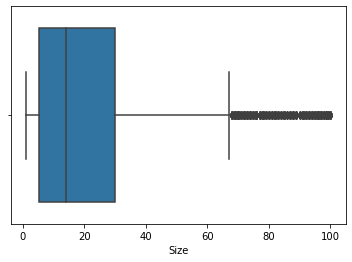

In [50]:
sns.boxplot(data = df , x ='Size')

In [51]:
df['Size'] = imputer.fit_transform(df[['Size']])

In [52]:
df.isnull().sum()

App                      0
Category                 0
Rating                   0
Reviews                  0
Size                     0
Installs                 0
Type                     0
Price                    0
Content Rating           0
Last Updated             0
Works_under_And_Ver_4    0
dtype: int64

## Feature Engineering 

In [53]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Works_under_And_Ver_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,"January 7, 2018",0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,"January 15, 2018",0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,"August 1, 2018",0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,"June 8, 2018",0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,"June 20, 2018",0
...,...,...,...,...,...,...,...,...,...,...,...
10352,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0.0,Everyone,"July 25, 2017",0
10353,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0.0,Everyone,"July 6, 2018",0
10354,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,"1,000+",Free,0.0,Everyone,"January 20, 2017",1
10355,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,14.0,"1,000+",Free,0.0,Mature 17+,"January 19, 2015",1


In [54]:
df['Last Updated'].sample(2)

3247    May 28, 2018
9719    May 24, 2018
Name: Last Updated, dtype: object

In [55]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'] , format="%B %d, %Y")

In [56]:
from datetime import datetime
df['App_Age'] = np.floor((datetime.now() - df['Last Updated']) / np.timedelta64(1,'M'))

In [57]:
df['App_Age']

0        53.0
1        53.0
2        47.0
3        48.0
4        48.0
         ... 
10352    59.0
10353    47.0
10354    65.0
10355    89.0
10356    47.0
Name: App_Age, Length: 10356, dtype: float64

In [58]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Works_under_And_Ver_4,App_Age
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,2018-01-07,0,53.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,2018-01-15,0,53.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,2018-08-01,0,47.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,2018-06-08,0,48.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,2018-06-20,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10352,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0.0,Everyone,2017-07-25,0,59.0
10353,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0.0,Everyone,2018-07-06,0,47.0
10354,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,"1,000+",Free,0.0,Everyone,2017-01-20,1,65.0
10355,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,14.0,"1,000+",Free,0.0,Mature 17+,2015-01-19,1,89.0


### Create Month , Year and weekday Column

In [60]:
df['Year'] = df['Last Updated'].dt.year

In [61]:
df['Month'] = df['Last Updated'].dt.month_name()

In [63]:
df['Day'] = df['Last Updated'].dt.day_name()

In [64]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Works_under_And_Ver_4,App_Age,Year,Month,Day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,2018-01-07,0,53.0,2018,January,Sunday
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,2018-01-15,0,53.0,2018,January,Monday
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,2018-08-01,0,47.0,2018,August,Wednesday
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,2018-06-08,0,48.0,2018,June,Friday
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,2018-06-20,0,48.0,2018,June,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0.0,Everyone,2017-07-25,0,59.0,2017,July,Tuesday
10353,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0.0,Everyone,2018-07-06,0,47.0,2018,July,Friday
10354,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,"1,000+",Free,0.0,Everyone,2017-01-20,1,65.0,2017,January,Friday
10355,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,14.0,"1,000+",Free,0.0,Mature 17+,2015-01-19,1,89.0,2015,January,Monday



## Questions

- What is the most expensive app on the store.
- Which Genre has more apps.
- What is the average size of the free apps & paid apps.
- What is the 5 top expenisve apps that has rate of 5.
- How many apps that has more than 50K reviews.
- What are the oldest and newest apps ?
- How many apps have rating > 4.7 and what is thier avg price.
- How much google earned from the 5,000,000+ installed apps
- What is the max and min size for free and paid apps.
- is there a correlation between rating, Reviews, Size with the price of the app
- How many apps for each type for each content rating.
- How many apps that can work on android version 4


- What is the most expensive app on the store ?


In [66]:
df[df['Price']==df['Price'].max()]['App']

3913    I'm Rich - Trump Edition
Name: App, dtype: object

- Which Genre has more apps?


In [68]:
df['Category'].value_counts().idxmax()

'FAMILY'

- What is the average size of the free apps & paid apps ? 

In [70]:
df.groupby('Type').mean()['Size']

Type
Free    20.688343
Paid    19.855163
Name: Size, dtype: float64

<AxesSubplot:xlabel='Type', ylabel='Size'>

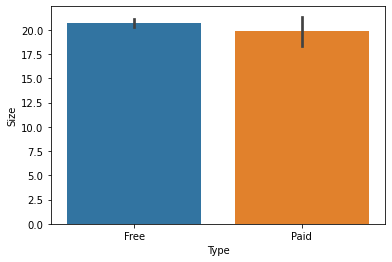

In [74]:
sns.barplot(data = df , x = 'Type' , y ='Size')

- What are the 5 top expenisve apps that has rate of 5?


In [73]:
df[df['Rating']==5].sort_values(by='Price',ascending= False).head()['App']

5033                    AP Art History Flashcards
7008                   USMLE Step 2 CK Flashcards
4790                        Hey AJ! It's Bedtime!
5026                   meStudying: AP English Lit
6735    TI-84 CE Graphing Calculator Manual TI 84
Name: App, dtype: object

#### How many apps that has more than 50K reviews.


In [76]:
df[df['Reviews']>50000].shape[0]

2525

#### - What are the oldest and newest apps ?


In [77]:
df[df['App_Age'] == df['App_Age'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Works_under_And_Ver_4,App_Age,Year,Month,Day
7010,FML F*ck my life + widget,FAMILY,4.2,1415,14.0,"100,000+",Free,0.0,Everyone,2010-05-21,1,145.0,2010,May,Friday


In [78]:
df[df['App_Age'] == df['App_Age'].min()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Works_under_And_Ver_4,App_Age,Year,Month,Day
14,3D Color Pixel by Number - Sandbox Art Coloring,ART_AND_DESIGN,4.4,1518,37.0,"100,000+",Free,0.00,Everyone,2018-08-03,1,46.0,2018,August,Friday
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39.0,"5,000,000+",Free,0.00,Everyone,2018-08-03,0,46.0,2018,August,Friday
85,CarMax – Cars for Sale: Search Used Car Inventory,AUTO_AND_VEHICLES,4.4,21777,14.0,"1,000,000+",Free,0.00,Everyone,2018-08-04,1,46.0,2018,August,Saturday
88,AutoScout24 Switzerland – Find your new car,AUTO_AND_VEHICLES,4.6,13372,14.0,"1,000,000+",Free,0.00,Everyone,2018-08-03,1,46.0,2018,August,Friday
140,E-Book Read - Read Book for free,BOOKS_AND_REFERENCE,4.5,1857,4.9,"50,000+",Free,0.00,Everyone,2018-08-03,0,46.0,2018,August,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4,"1,000+",Paid,7.99,Everyone,2018-08-08,0,46.0,2018,August,Wednesday
10306,HipChat - beta version,COMMUNICATION,4.1,1035,20.0,"50,000+",Free,0.00,Everyone,2018-08-07,0,46.0,2018,August,Tuesday
10319,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81.0,"1,000,000+",Free,0.00,Teen,2018-08-07,0,46.0,2018,August,Tuesday
10321,Scoreboard FR,LIFESTYLE,4.3,3,15.0,100+,Free,0.00,Everyone,2018-08-07,0,46.0,2018,August,Tuesday


#### - How many apps have rating > 4.7 and what is thier avg price? 

In [81]:
df[df['Rating'] > 4.7 ].shape[0]

586

In [84]:
df[df['Rating'] > 4.7 ].mean()['Price']

C:\Users\be421\AppData\Local\Temp\ipykernel_6300\1879487663.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[df['Rating'] > 4.7 ].mean()['Price']
C:\Users\be421\AppData\Local\Temp\ipykernel_6300\1879487663.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Rating'] > 4.7 ].mean()['Price']


0.4550000000000003

### How much google earned from the 5,000,000+ installed apps ? 

In [86]:
df[df['Installs']==5000000].sum()['Price']

C:\Users\be421\AppData\Local\Temp\ipykernel_6300\455229464.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Installs']==5000000].sum()['Price']


0.0

#### - What is the max and min size for free and paid apps?

In [88]:
df.groupby('Type').describe()['Size']

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,9591.0,20.688343,20.736066,1.0,6.7,14.0,26.0,100.0
Paid,765.0,19.855163,20.418723,1.0,5.4,14.0,25.0,100.0


<AxesSubplot:xlabel='Type', ylabel='Size'>

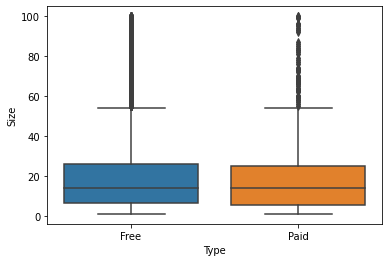

In [89]:
sns.boxplot(data = df , x ='Type' , y= 'Size')

### is there a correlation between rating, Reviews, Size with the price of the app


In [92]:
df.corr()['Price']

Rating                  -0.019708
Reviews                 -0.009418
Size                    -0.020046
Price                    1.000000
Works_under_And_Ver_4   -0.016292
App_Age                  0.004840
Year                    -0.005624
Name: Price, dtype: float64

<AxesSubplot:>

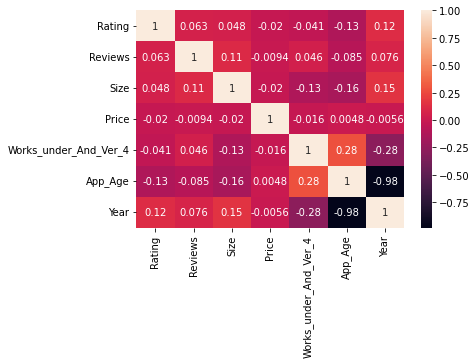

In [93]:
sns.heatmap(df.corr(),annot=True)

###  How many apps for each type for each content rating.


In [97]:
x = pd.pivot_table(index='Type', columns='Content Rating', values='Rating', data=df, aggfunc='count')
x

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
Type,,,,,
Free,3.0,7722.0,344.0,428.0,1094.0
Paid,NaN,662.0,32.0,19.0,52.0


<AxesSubplot:xlabel='Content Rating', ylabel='Type'>

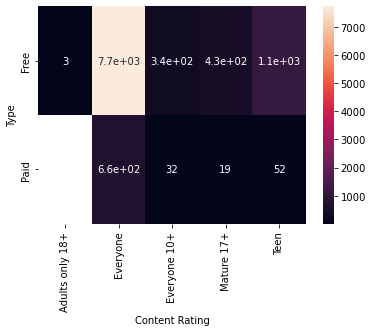

In [96]:
sns.heatmap(x,annot=True)

#### How many apps that can work under android version 4 ?


<AxesSubplot:xlabel='Works_under_And_Ver_4', ylabel='count'>

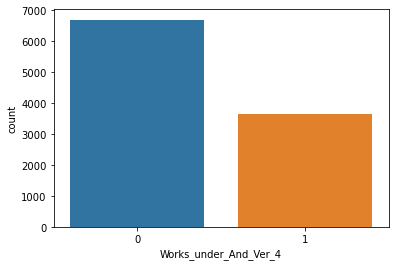

In [98]:
sns.countplot(data = df , x ='Works_under_And_Ver_4')

In [99]:
df['Works_under_And_Ver_4'].value_counts()

0    6697
1    3659
Name: Works_under_And_Ver_4, dtype: int64

#### what is the month,year,day that has the most released apps ?

In [101]:
df['Year'].value_counts()

2018    6933
2017    1826
2016     789
2015     454
2014     204
2013     108
2012      26
2011      15
2010       1
Name: Year, dtype: int64

In [102]:
df['Month'].value_counts()

July         2950
August       1466
June         1225
May           962
March         656
April         600
February      527
January       480
December      421
October       387
November      374
September     308
Name: Month, dtype: int64

In [103]:
df['Day'].value_counts()

Thursday     1886
Tuesday      1841
Wednesday    1837
Friday       1734
Monday       1691
Saturday      733
Sunday        634
Name: Day, dtype: int64